In [1]:
import pandas as pd
import numpy as np

In [2]:
# clusters = pd.read_csv('cluster_subject_mapping.csv', index_col = 'subject')
# clusters[0:5]

In [3]:
diffusion = pd.read_csv('ADDITIONAL_FEATURES2.csv', index_col = 'Subject')
behavior = diffusion.iloc[:, 4:6]

In [12]:
anger = behavior.iloc[:,0]
fear = behavior.iloc[:,1]
anger.shape

(967,)

In [5]:
data = pd.read_csv("structural_neuroimaging.csv", index_col = 'Subject')
data.shape

(967, 31)

In [6]:
# s1200_subjects = pd.read_csv(
#    "s1200_subject_ids.csv",
# )
# subject_ids = list(s1200_subjects['Subject'])
# len(subject_ids)
subject_ids = data.index


In [7]:
# data = data.loc[data.index.isin(subject_ids)]
# data.shape
HCP_total_sample = pd.read_csv(
   "HCP_total_sample.csv",
    index_col = 'Subject'
)
HCP_total_sample = HCP_total_sample.loc[HCP_total_sample.index.isin(subject_ids)]
HCP_total_sample

,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_Full_Task_fMRI,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
Subject,,,,,,,,,,,,,,,,,,,,,
100206,S900,Q11,M,26-30,True,1,1,4,100.0,True,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
100307,Q1,Q01,F,26-30,True,1,1,4,100.0,True,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
100408,Q3,Q03,M,31-35,True,1,1,4,100.0,True,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
100610,S900,Q08,M,26-30,True,2,1,4,100.0,True,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88
101006,S500,Q06,F,31-35,True,2,2,4,100.0,True,...,6.0,122.25,111.41,0.0,38.6,123.80,123.31,1.80,0.0,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992673,S900,Q12,F,31-35,True,1,2,4,100.0,True,...,3.6,122.25,111.41,1.0,38.6,101.63,99.26,1.80,0.0,1.80
992774,Q2,Q02,M,31-35,True,2,2,4,100.0,True,...,8.4,122.25,111.41,4.0,50.1,107.17,103.55,1.76,0.0,1.76
993675,S900,Q09,F,26-30,True,2,2,4,100.0,True,...,0.4,122.25,110.45,0.0,38.6,84.07,84.25,1.80,1.0,1.76


In [8]:
drop_columns = ['Age',
                'Age_dummy',
                'Sex',
                'Sex_dummy',
                'QC_Issue',
                'FS_L_Amygdala_Vol',
                'FS_R_Amygdala_Vol',
                'FS_L_Insula_Thck',
                'FS_R_Insula_Thck',
                'FS_L_Caudalanteriorcingulate_Thck',
                'FS_R_Caudalanteriorcingulate_Thck',
                'FS_L_Caudalanteriorcingulate_Area',
                'FS_R_Caudalanteriorcingulate_Area',
                'FS_L_Rostralanteriorcingulate_Thck',
                'FS_R_Rostralanteriorcingulate_Thck',
                'FS_L_Rostralanteriorcingulate_Area',
                'FS_R_Rostralanteriorcingulate_Area',
                'FS_L_Medialorbitofrontal_Thck',
                'FS_R_Medialorbitofrontal_Thck',
                'FS_L_Medialorbitofrontal_Area',
                'FS_R_Medialorbitofrontal_Area',
                'MRsession_Scanner_3T', 
                # 'Avg_Amygdala_Vol', # dropping some more
                # 'Avg_Caudalanteriorcingulate_Area',
                # 'Avg_Rostralanteriorcingulate_Area',
                # 'Avg_Medialorbitofrontal_Area',
                'FS_BrainSeg_Vol_No_Vent'
               ]

In [10]:
processed_df = data.drop(drop_columns, axis=1)
processed_df
# processed_df  = data

,Avg_Amygdala_Vol,Avg_Insula_Thck,Avg_Caudalanteriorcingulate_Thck,Avg_Caudalanteriorcingulate_Area,Avg_Rostralanteriorcingulate_Thck,Avg_Rostralanteriorcingulate_Area,Avg_Medialorbitofrontal_Thck,Avg_Medialorbitofrontal_Area
Subject,,,,,,,,
100206,1864.0,3.2380,2.5935,957.5,3.1085,977.0,2.5965,2345.5
100307,1597.0,3.1755,3.1365,567.5,3.0345,622.0,2.9265,1768.5
100408,1599.0,2.9575,2.4100,847.0,2.8475,725.0,2.6460,2315.5
100610,1985.5,3.1120,2.8260,799.0,3.2445,694.0,2.6560,2254.5
101006,1400.5,2.9765,2.2735,1004.5,2.9055,622.0,2.6315,1733.5
...,...,...,...,...,...,...,...,...
992673,1359.0,3.0435,2.3485,691.5,2.6810,697.5,2.5605,1819.5
992774,1481.0,3.1260,2.6700,700.5,3.0915,767.0,2.7250,1660.0
993675,1444.5,3.0925,2.8095,728.5,3.0005,660.5,2.7405,1635.0


In [29]:
# filtered_df = clusters.loc[clusters.index.isin(data.index), :].copy()
# clusters_labels = filtered_df['cluster'].tolist()
# len(clusters_labels)
# processed_df = processed_df.loc[processed_df.index.isin(filtered_df.index), :].copy()

clusters_labels = anger.tolist()
clusters_labels = fear.tolist()

In [30]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

data = processed_df.copy()
# Perform UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')
embedding = reducer.fit_transform(data.values)

embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['Cluster'] = clusters_labels

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
tsne_embedding = tsne.fit_transform(data.values)

# Convert the t-SNE embedding to a DataFrame for easy plotting
tsne_embedding_df = pd.DataFrame(tsne_embedding, columns=['TSNE1', 'TSNE2'])
tsne_embedding_df['Cluster'] = clusters_labels

# Perform PCA
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(data.values)

# Convert the PCA embedding to a DataFrame for easy plotting
pca_embedding_df = pd.DataFrame(pca_embedding, columns=['PCA1', 'PCA2'])
pca_embedding_df['Cluster'] = clusters_labels

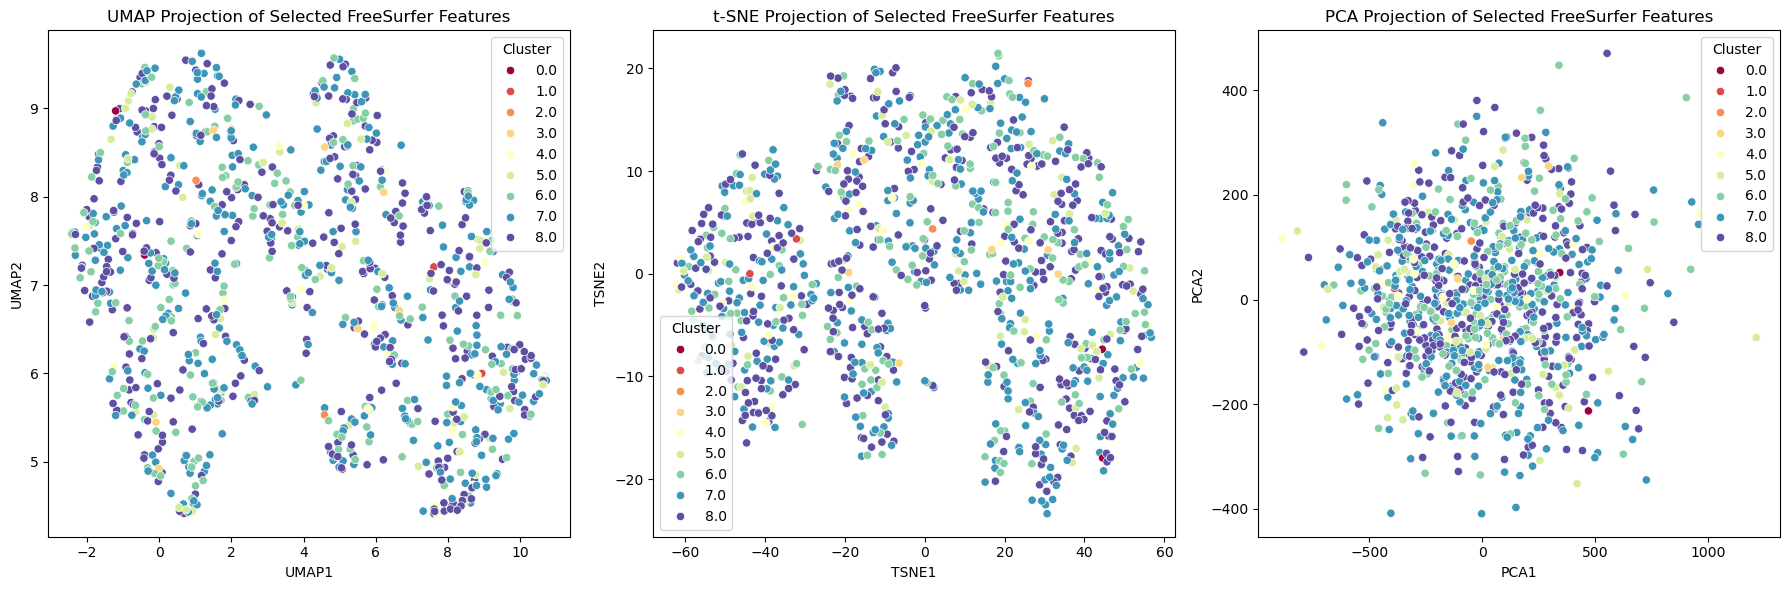

In [31]:
# Plot the UMAP, t-SNE, and PCA embeddings side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# UMAP plot
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', palette='Spectral', data=embedding_df, legend='full', ax=axes[0])
axes[0].set_title('UMAP Projection of Selected FreeSurfer Features')

# t-SNE plot
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='Spectral', data=tsne_embedding_df, legend='full', ax=axes[1])
axes[1].set_title('t-SNE Projection of Selected FreeSurfer Features')

# PCA plot
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Spectral', data=pca_embedding_df, legend='full', ax=axes[2])
axes[2].set_title('PCA Projection of Selected FreeSurfer Features')

plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

# Assuming processed_df and clusters are already defined

# Encode cluster labels to ensure they are between 0 and n_classes - 1
label_encoder = LabelEncoder()
clusters_labels = label_encoder.fit_transform(clusters_labels)

# Convert cluster labels to a NumPy array
clusters_labels = np.array(clusters_labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(processed_df.values, clusters_labels, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # LongTensor for classification
y_test_tensor = torch.tensor(y_test, dtype=torch.long)  # LongTensor for classification

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [33]:
import torch.nn as nn
import torch.optim as optim

class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size*2)
        self.fc2 = nn.Linear(hidden_size*2, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 18)
        self.fc4 = nn.Linear(18, 9)
        self.fc5 = nn.Linear(9, num_classes)  # Output layer for classification
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Add dropout for regularization
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.fc5(x)
        return x

# Check if GPU is available and use it if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model, loss function, and optimizer
input_size = processed_df.shape[1]
hidden_size = 32
num_classes = len(np.unique(clusters_labels))  # Number of unique clusters

model = MLPClassifier(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)


In [34]:
def train_classifier_model(train_loader, test_loader, model, criterion, optimizer, scheduler, num_epochs=50, patience=7):
    best_loss = float('inf')
    epochs_no_improve = 0
    early_stop = False
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        train_accuracy = 100 * correct / total
        train_accuracies.append(train_accuracy)
        
        # Evaluate on test set
        model.eval()
        test_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item() * inputs.size(0)
                
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)
        test_accuracy = 100 * correct / total
        test_accuracies.append(test_accuracy)
        
        scheduler.step(test_loss)
        
        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
        
        # Early stopping
        if test_loss < best_loss:
            best_loss = test_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print('Early stopping!')
            early_stop = True
            break
    
    return model, train_losses, test_losses, train_accuracies, test_accuracies

# Train the model
num_epochs = 100
patience = 100
model, train_losses, test_losses, train_accuracies, test_accuracies = train_classifier_model(train_loader, test_loader, model, criterion, optimizer, scheduler, num_epochs=num_epochs, patience=patience)


Epoch 1/100, Training Loss: 2.3072, Training Accuracy: 3.62%, Test Loss: 2.2607, Test Accuracy: 1.03%
Epoch 2/100, Training Loss: 2.2639, Training Accuracy: 10.61%, Test Loss: 2.2180, Test Accuracy: 23.20%
Epoch 3/100, Training Loss: 2.2170, Training Accuracy: 15.91%, Test Loss: 2.1701, Test Accuracy: 23.20%
Epoch 4/100, Training Loss: 2.1474, Training Accuracy: 22.25%, Test Loss: 2.0748, Test Accuracy: 32.99%
Epoch 5/100, Training Loss: 2.0231, Training Accuracy: 29.50%, Test Loss: 1.8843, Test Accuracy: 33.51%
Epoch 6/100, Training Loss: 1.9103, Training Accuracy: 33.38%, Test Loss: 1.7564, Test Accuracy: 33.51%
Epoch 7/100, Training Loss: 1.8198, Training Accuracy: 33.12%, Test Loss: 1.6760, Test Accuracy: 33.51%
Epoch 8/100, Training Loss: 1.7818, Training Accuracy: 31.05%, Test Loss: 1.6227, Test Accuracy: 31.96%
Epoch 9/100, Training Loss: 1.7472, Training Accuracy: 32.60%, Test Loss: 1.5909, Test Accuracy: 30.41%
Epoch 10/100, Training Loss: 1.6649, Training Accuracy: 33.12%, Te

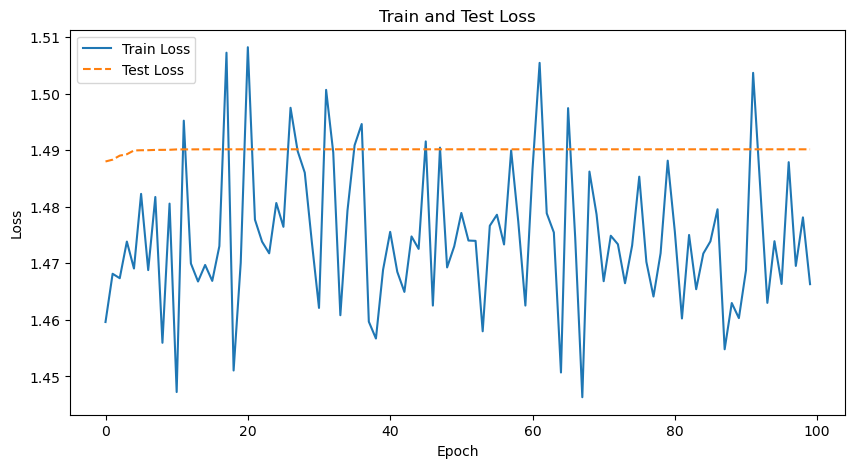

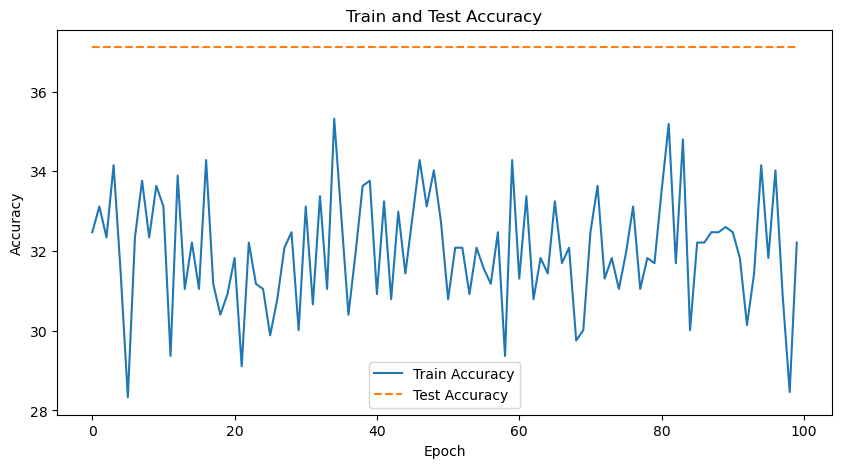

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()
plt.show()
